In [2]:

# import libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

plt.style.use('ggplot')

import matplotlib as mpl

# Read and Merge Data - basic - remove nan / duplicate values

In [3]:

# load the data for df_final_demo
pd.set_option('display.max_columns', 120) 

df_final_demo = pd.read_csv('../Data/Cleaned/df_final_demo (1).txt')

# check for missing values
df_final_demo[df_final_demo.isnull().any(axis=1)]

# remove the missing values
df_final_demo = df_final_demo.dropna()

# remove gendr value X
df_final_demo = df_final_demo[df_final_demo['gendr'] != 'X']
df_final_demo['gendr'].value_counts()

df_final_demo


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [4]:
# load the data for df_final_web_data

df_web_data1 = pd.read_csv('../Data/Cleaned/df_final_web_data_pt_1.txt')
df_web_data2 = pd.read_csv('../Data/Cleaned/df_final_web_data_pt_2.txt')
df_final_experiment = pd.read_csv('../Data/Cleaned/df_final_experiment_clients.txt')

# merge the data
df_web_data = pd.concat([df_web_data1, df_web_data2])

# check the duplicate
df_web_data.duplicated().sum()

# remove the duplicate
df_web_data = df_web_data.drop_duplicates()

#remove nan values for df_final_experiment
df_final_experiment = df_final_experiment.dropna()

#merge df_web_data and df_final_experiment
df_web_data = pd.merge(df_web_data, df_final_experiment, on='client_id', how='inner')

df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [5]:
# merge all the data
df = pd.merge(df_web_data,df_final_demo, on='client_id', how='left')

# make all columns lowercase
df.columns = df.columns.str.lower()
df.columns


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

#### In the dataframe df, the numerical variables are:

clnt_tenure_yr - discrete variables

clnt_tenure_mnth  - discrete variables

clnt_age - discrete variables

num_accts - discrete variables

calls_6_mnth - discrete variables

logons_6_mnth - discrete variables


bal - continuous variable 


#### The categorical variables are:

variation - nominal variable

gendr - ordinal variable

# EDA about demo dataset 


Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?


Text(0, 0.5, 'Count')

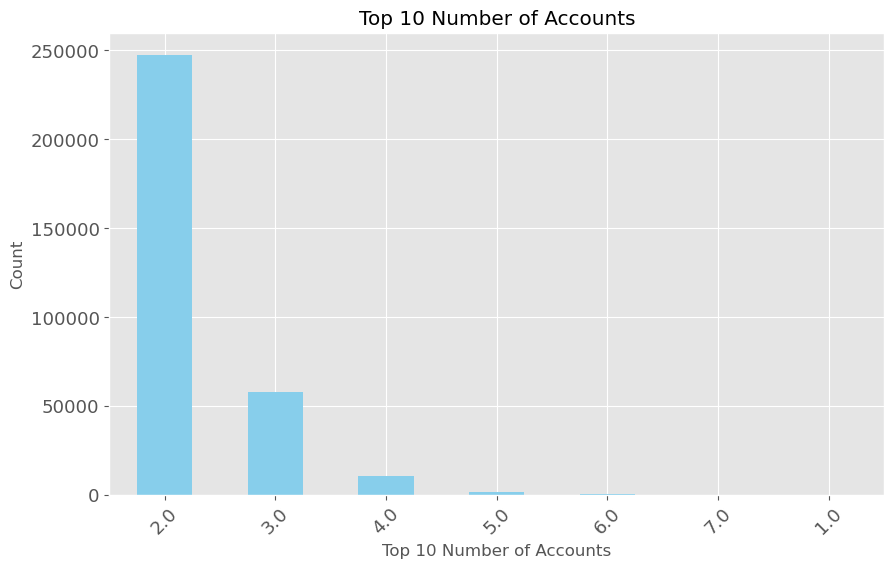

In [6]:
account_plot = df['num_accts'].value_counts() \
    .head(10) \
    .plot(kind='bar', figsize=(10, 6), color='skyblue', fontsize=13, rot=45, title='Top 10 Number of Accounts')
account_plot.set_xlabel('Top 10 Number of Accounts')
account_plot.set_ylabel('Count')

Text(0, 0.5, 'Count')

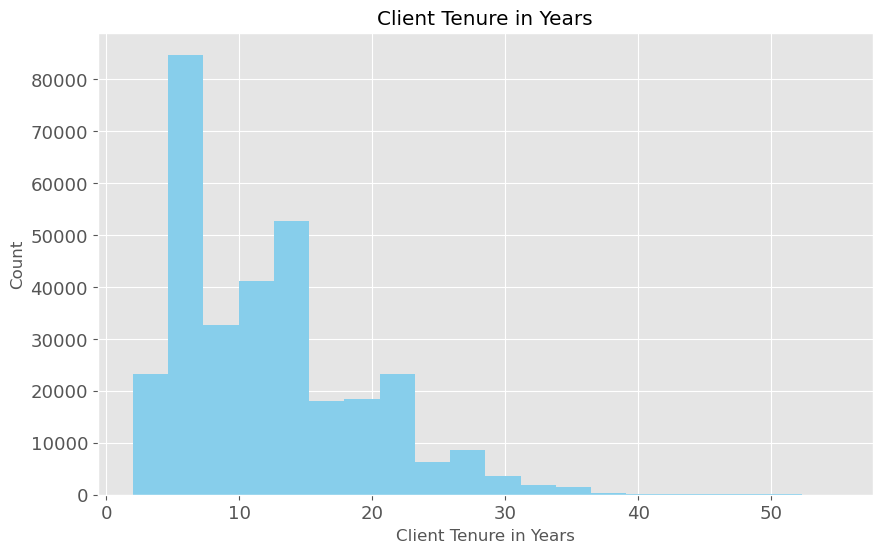

In [7]:
df['clnt_tenure_yr'].plot(kind='hist', bins=20, color='skyblue', figsize=(10, 6), fontsize=13, title='Client Tenure in Years')
plt.xlabel('Client Tenure in Years')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

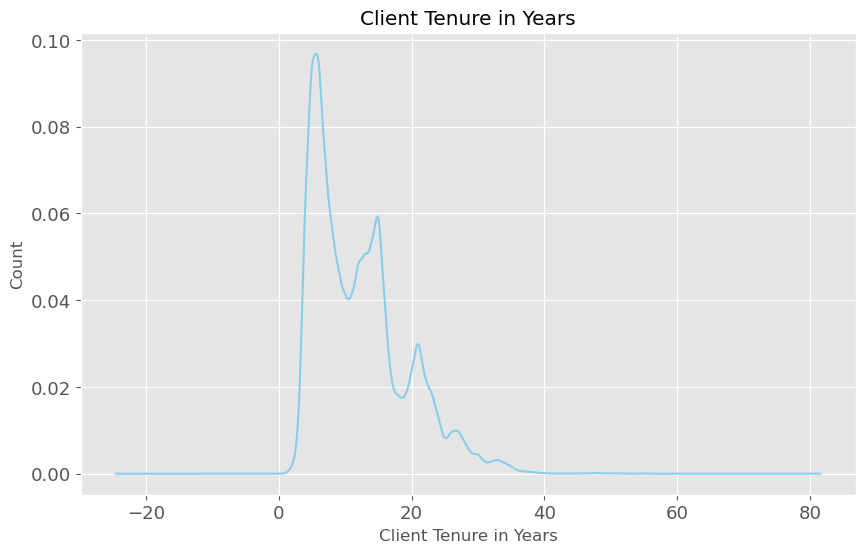

In [8]:
df['clnt_tenure_yr'].plot(kind='kde', color='skyblue', figsize=(10, 6), fontsize=13, title='Client Tenure in Years')
plt.xlabel('Client Tenure in Years')
plt.ylabel('Count')

In [9]:
# create a dataframe for the demographic data
df_demo = df[['client_id', 'date_time', 'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']]
df_demo.head(5)

# create two dataframes based on the variation
df_control = df_demo[df_demo['variation'] == 'Control']
df_test = df_demo[df_demo['variation'] == 'Test']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

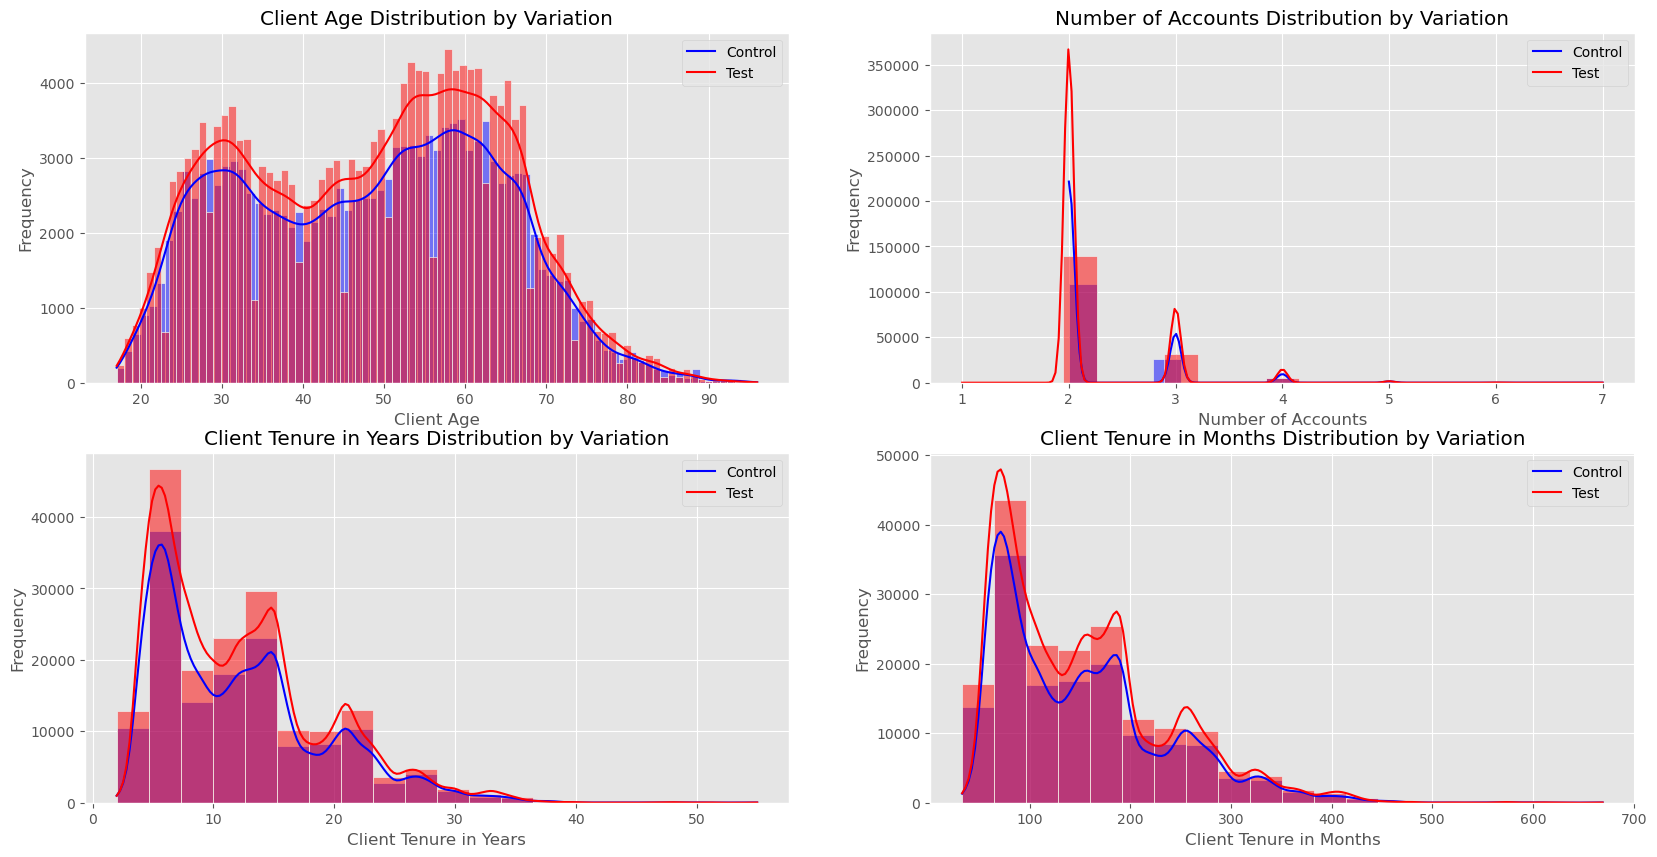

In [10]:
# using stacked histogram to compare the difference between the two groups, for clnt_age and num_accts, and clin_tenure_yr, clnt_tenure_mnth

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(df_control['clnt_age'], kde=True, ax=axes[0, 0], color='blue', alpha=0.5)
sns.histplot(df_test['clnt_age'], kde=True, ax=axes[0, 0], color='Red', alpha=0.5)

sns.histplot(df_control['num_accts'], kde=True, ax=axes[0, 1], color='blue', alpha=0.5)
sns.histplot(df_test['num_accts'], kde=True, ax=axes[0, 1], color='red', alpha=0.5)

sns.histplot(df_control['clnt_tenure_yr'], kde=True, ax=axes[1, 0], bins=20, color='blue', alpha=0.5)
sns.histplot(df_test['clnt_tenure_yr'], kde=True, ax=axes[1, 0],bins=20, color='red', alpha=0.5)

sns.histplot(df_control['clnt_tenure_mnth'], kde=True, ax=axes[1, 1],bins=20, color='blue', alpha=0.5)
sns.histplot(df_test['clnt_tenure_mnth'], kde=True, ax=axes[1, 1],bins=20, color='red', alpha=0.5)
             
# add labels

axes[0, 0].set_xlabel('Client Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Client Age Distribution by Variation')

axes[0, 1].set_xlabel('Number of Accounts')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Number of Accounts Distribution by Variation')

axes[1, 0].set_xlabel('Client Tenure in Years')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Client Tenure in Years Distribution by Variation')

axes[1, 1].set_xlabel('Client Tenure in Months')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Client Tenure in Months Distribution by Variation')

# add legend

axes[0, 0].legend(['Control', 'Test'])
axes[0, 1].legend(['Control', 'Test'])
axes[1, 0].legend(['Control', 'Test'])
axes[1, 1].legend(['Control', 'Test'])


Text(0, 0.5, 'Number of Accounts')

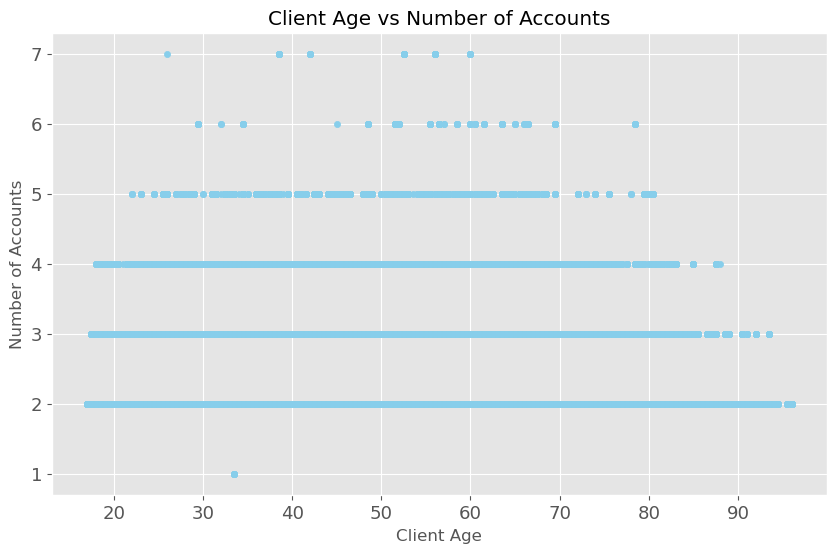

In [11]:
df.plot(kind='scatter', x='clnt_age', y='num_accts', figsize=(10, 6), color='skyblue', fontsize=13, title='Client Age vs Number of Accounts')
plt.xlabel('Client Age')
plt.ylabel('Number of Accounts')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

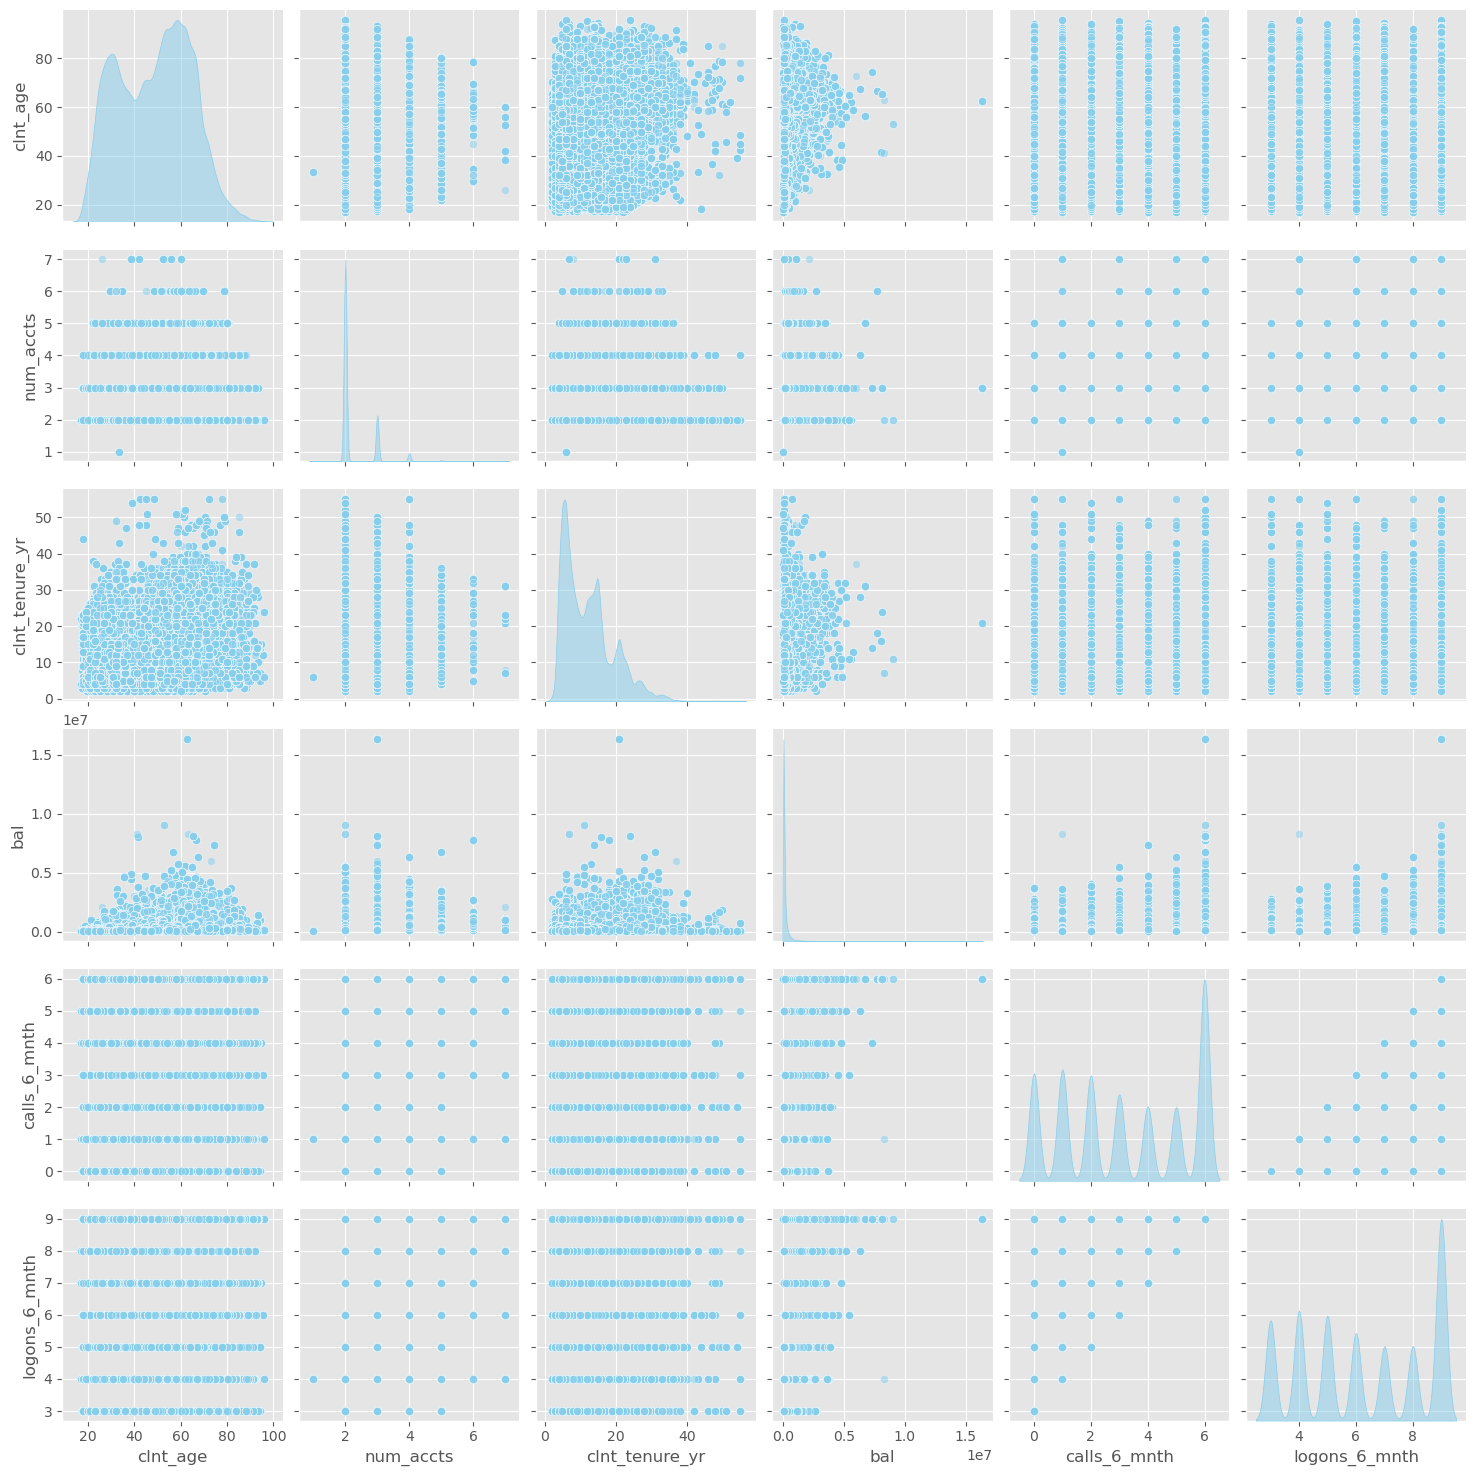

In [14]:

sns.pairplot(df, 
             vars=['clnt_age', 'num_accts', 'clnt_tenure_yr', 'bal', 'calls_6_mnth', 'logons_6_mnth'], 
             diag_kind='kde', plot_kws={'color':'skyblue', 'alpha':0.5}, 
             diag_kws={'color':'skyblue', 'alpha':0.5})

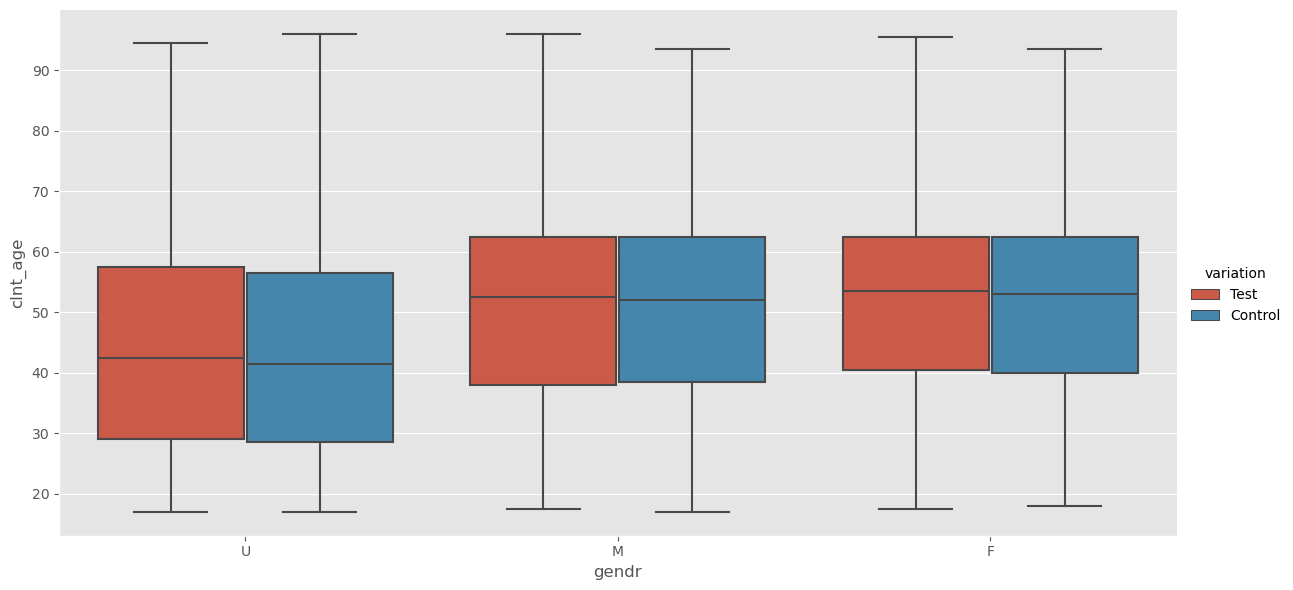

In [15]:
# use catplot to show the age distribution by variation
sns.catplot(x='gendr', y='clnt_age', hue='variation', data=df, kind='box', height=6, aspect=2)

### CLIENT Gender AND VARIANCE ANALYSIS

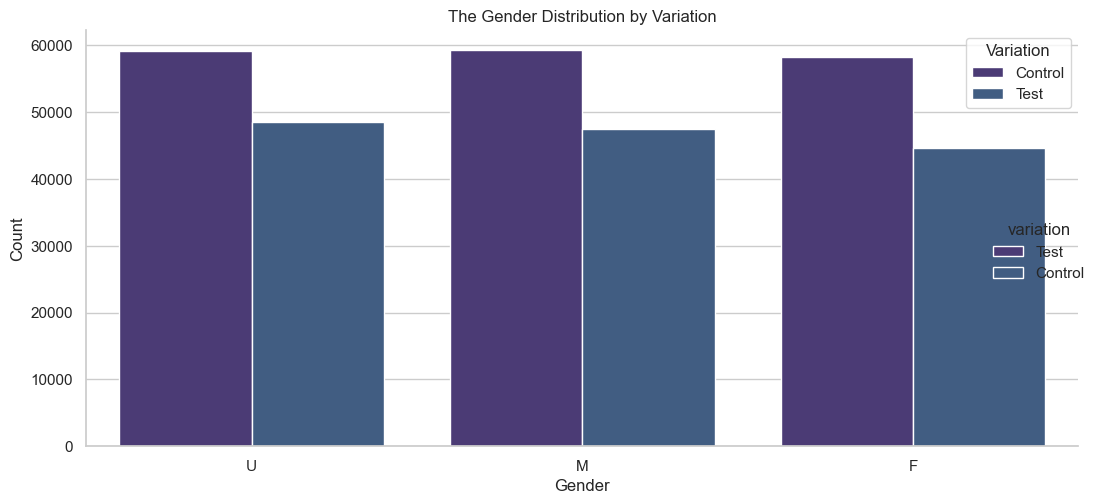

In [24]:
# create a grouped bar chart to compare gender distribution by variation

sns.set_theme(style="whitegrid", palette='viridis')
sns.catplot(x='gendr', kind='count', hue='variation', data=df_demo, height=5, aspect=2)

# add labels
plt.xlabel('Gender')
plt.ylabel('Count')
# make visual tight
plt.tight_layout()

# add title
plt.title('The Gender Distribution by Variation')

# add legend
plt.legend(title='Variation', loc='upper right', labels=['Control', 'Test'])

In [25]:
# create a cross tab for the gender and variation
gendr_variation = pd.crosstab(df_demo['gendr'], df_demo['variation'])

# compute the probability of the age and variation
gendr_variation['prob_control'] = gendr_variation['Control'] / gendr_variation['Control'].sum()
gendr_variation['prob_test'] = gendr_variation['Test'] / gendr_variation['Test'].sum()

# use chi-square test to determine if the age and variation are independent
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(gendr_variation[['Control', 'Test']])
p


8.757114930897778e-13

In [26]:
# explain the result
if p < 0.05:
    print('There is a significant difference between the gender and variation')
else:
    print('There is no significant difference between the gender and variation')

There is a significant difference between the gender and variation


In [ ]:
# calls_6_mnth: Records the number of times the client reached out over a call in the past six months.
# logons_6_mnth: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.

#using displot to compare the difference between the two groups, for calls_6_mnth and logons_6_mnth
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(df_control['calls_6_mnth'], kde=True, ax=axes[0], color='blue', alpha=0.5)
sns.histplot(df_test['calls_6_mnth'], kde=True, ax=axes[0], color='red', alpha=0.5)

sns.histplot(df_control['logons_6_mnth'], kde=True, ax=axes[1], color='blue', alpha=0.5)
sns.histplot(df_test['logons_6_mnth'], kde=True, ax=axes[1], color='red', alpha=0.5)

# add labels
axes[0].set_xlabel('Number of Calls in the Last 6 Months')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Number of Calls in the Last 6 Months Distribution by Variation')

axes[1].set_xlabel('Number of Logons in the Last 6 Months')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Number of Logons in the Last 6 Months Distribution by Variation')

# add legend
axes[0].legend(['Control', 'Test'])
axes[1].legend(['Control', 'Test'])


In [ ]:
# pie chart to show the distribution of the variation
plt.figure(figsize=(10, 7))
df_demo['variation'].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',colors=['#FFA07A', '#20B2AA', '#87CEFA'])
plt.title('Variation Distribution')
plt.show()

## Checking the correlation between numerical variables

In [16]:
df_demo[['clnt_tenure_yr', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']].corr()

,clnt_tenure_yr,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
clnt_tenure_yr,1.000000,0.311358,0.156920,0.197136,0.060673,0.065159
clnt_age,0.311358,1.000000,-0.015003,0.201102,0.076142,0.084942
num_accts,0.156920,-0.015003,1.000000,0.264191,0.237042,0.241659
bal,0.197136,0.201102,0.264191,1.000000,0.167321,0.174484
calls_6_mnth,0.060673,0.076142,0.237042,0.167321,1.000000,0.994372
logons_6_mnth,0.065159,0.084942,0.241659,0.174484,0.994372,1.000000


Text(50.58159722222221, 0.5, 'Numerical Variables')

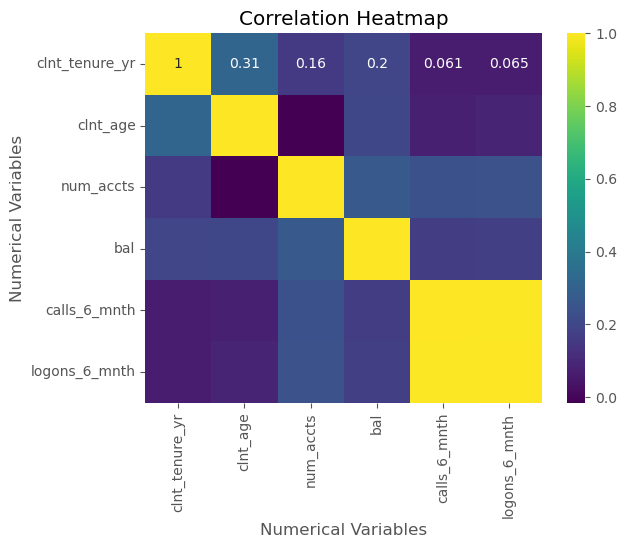

In [23]:
# use heatmap to show the correlation between the numerical variables, clnt_tenure_yr, clnt_tenure_mnth, clnt_age, num_accts, bal, calls_6_mnth, logons_6_mnth

sns.heatmap(df_demo[['clnt_tenure_yr', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')

# add labels
plt.xlabel('Numerical Variables')
plt.ylabel('Numerical Variables')


### Explain the result
The heatmap shows that there is a strong correlation between the number of accounts and the balance.

There is also a moderate correlation between the number of calls in the last 6 months and the number of logons in the last 6 months.


The heatmap shows the correlation between the numerical variables. The correlation ranges from -1 to 1.


A correlation of 1 indicates a perfect positive correlation, while a correlation of -1 indicates a perfect negative correlation.



In [ ]:
df_demo['num_accts'].unique()

df_demo.isnull().sum()

# Remove rows with NaN values
df_demo_clean = df_demo.dropna()

# Calculate Pearson correlation
corr, p = pearsonr(df_demo_clean['num_accts'], df_demo_clean['bal'])
corr, p

# explain the pearson value
if corr > 0.5:
    print('The correlation between the number of accounts and balance is strong')
elif corr > 0.3:
    print('The correlation between the number of accounts and balance is moderate')
else:
    print('The correlation between the number of accounts and balance is weak')
    

In [ ]:
# use QQ plot to check the normality of the num_accts and bal
import statsmodels.api as sm

sm.qqplot(df_demo['num_accts'], line='s')
plt.title('QQ Plot - num_accts')
plt.show()

# QQ plot for bal
sm.qqplot(df['bal'], line='s')
plt.title('QQ Plot - bal')
plt.show()


# KPIS

## Caculate the completion rate by counting how many confirm by client_id



### The defination of completion rate:  When a client has reach to confirm step which is process_step is confrim, meaning the client has complete the process, only client only has one confirm 

In [ ]:

# add a new column to show the number of steps
df['num_steps'] = df['process_step'].map({'start':0, 'step_1':1, 'step_2':2, 'step_3':3, 'confirm':4})

# df sorted by client_id and date
df = df.sort_values(by=['client_id', 'date_time'])

In [ ]:
# count the number of steps for each client
df_count_step = df.groupby(['client_id', 'num_steps']).size().unstack(fill_value=0)
# merge the data with the demographic data
df_num_steps = pd.merge(df_count_step, df_final_experiment, on='client_id', how='left')


# if a client_id, cloumn 4 value >=1 then the client has completed the process
df_num_steps['completed'] = df_num_steps[4] >= 1
df_num_steps['completed'].value_counts()

# calculate the percentage of clients who completed the process
completed_clients = df_num_steps[df_num_steps['completed'] == True]
not_completed_clients = df_num_steps[df_num_steps['completed'] == False]

# calculate the percentage of clients who completed the process 
completed_percentage = (completed_clients['client_id'].nunique() / df['client_id'].nunique()) * 100

# calculate the percentage of clients who did not complete the process
not_completed_percentage = (not_completed_clients['client_id'].nunique() / df['client_id'].nunique()) * 100

completed_percentage, not_completed_percentage

In [ ]:
# using grouped bar chart to completed precentage by variation
sns.set_theme(style="whitegrid", palette='viridis')
sns.catplot(x='completed', kind='count', hue='Variation', data=df_num_steps, height=5, aspect=2)

# add labels
plt.xlabel('Completed')
plt.ylabel('Count')
# make visual tight
plt.tight_layout()

# add title
plt.title('The Completed Percentage by Variation')

In [ ]:
# create a cross tab for the completed and variation
completed_variation = pd.crosstab(df_num_steps['completed'], df_num_steps['Variation'])
# add proportion of the completed and variation
completed_variation['prob_control'] = completed_variation['Control'] / completed_variation['Control'].sum()
completed_variation['prob_test'] = completed_variation['Test'] / completed_variation['Test'].sum()


In [ ]:
completed_variation

# make pie charts to compare the percentage of clients who completed the process by control and test group
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
completed_variation['Control'].plot.pie(autopct='%1.1f%%', ax=axes[0], colors=['#FFA07A', '#20B2AA', '#87CEFA'])
axes[0].set_title('Percentage of Clients Who Completed the Process in the Control Group')

completed_variation['Test'].plot.pie(autopct='%1.1f%%', ax=axes[1], colors=['#FFA07A', '#20B2AA', '#87CEFA'])
axes[1].set_title('Percentage of Clients Who Completed the Process in the Test Group')

# add legend
axes[0].legend(['Control', 'Test'])
axes[1].legend(['Control', 'Test'])



## ADD THE TIME SPEND ON EACH STEP

In [ ]:

# organzie the data by date_time
df['date_time'] = pd.to_datetime(df['date_time'])
#calculate the time difference by client_id
df['time_diff'] = np.where(df['visit_id'] != df['visit_id'].shift(1), 0, df.sort_values(['client_id', 'date_time']).groupby('client_id')['date_time'].diff().dt.total_seconds().fillna(0))

# add time spend column which is time_diff move up by one row
df['time_spend'] = df.groupby(["visit_id"])['time_diff'].shift(-1)

In [ ]:
pd.set_option('display.max_rows', 120)
# df[df['client_id'] == 3825423]

In [ ]:
# each client the average time spend on each step by variation
df_web_data_grouped_client = df.groupby(['variation', 'client_id', 'num_steps'])['time_spend'].mean().reset_index()
df_web_data_grouped_client

# using seaborn catplot to create a grouped bar chart
sns.catplot(x='num_steps', y='time_spend', hue='variation', data=df_web_data_grouped, kind='bar', height=6, aspect=2, palette = 'viridis')
plt.title('Time Spend on Each Step by Variation')
plt.xticks([0, 1, 2,3, 4], ['start','step 1', 'step 2', 'step 3', 'confirm'])
plt.show()


# Mark the error

In [ ]:
df_num_steps

In [ ]:
# add the error column to the data
df['error'] = np.where((df['visit_id'] == df['visit_id'].shift(1)) & (df['num_steps'] <= df['num_steps'].shift(1)), 'error', 'nan')

In [ ]:
# checking this id and sort it by date_time 
# df[df['client_id'] == 8290360]

In [ ]:
pd.set_option('display.max_rows', 120)
 # df[df['client_id'] == 1336]

In [ ]:
# show a countplot of the error column by variation
sns.countplot(x='error', data=df, hue='variation', palette='viridis')

In [ ]:
# show error by num_steps and variation
df_web_data_error = df[df['error'] == 'error']
df_web_data_error_grouped = df_web_data_error.groupby(['variation', 'num_steps'])['error'].count().reset_index()
df_web_data_error_grouped

In [ ]:
# using seaborn catplot to create a grouped bar chart
sns.catplot(x='num_steps', y='error', hue='variation', data=df_web_data_error_grouped, kind='bar', height=6, aspect=2, palette = 'viridis')
plt.title('Error by Step and Variation')
plt.xticks([0, 1, 2,3, 4], ['start','step 1', 'step 2', 'step 3', 'confirm'])
plt.show()

# Hypothesis Testing

Given the data and KPIs you have explored discussed, one interesting hypothesis to test is related to the completion rate between the Test and Control groups. 

Since the new design (Test group) had a higher completion rate compared to the old design (Control group), you are required to confirm if this difference is statistically significant.

Make sure to define the proper null and an alternative hypothesis to test it. 

Use the provided data to test these hypotheses, and determine if you can reject the null hypothesis in favor of the alternative. 

Make sure to consider the significance level, p-value, the statistical test prerequisites, and other relevant statistical measures in your analysis.

In [ ]:
df_num_steps

In [ ]:
df_test = df_num_steps[df_num_steps["Variation"]=="Test"]["completed"]
df_control = df_num_steps[df_num_steps["Variation"]=="Control"]["completed"]

In [ ]:
#Set the hypothesis

#H0: Test Group completion rate <= Control Group completion rate
#H1: Test Group completion rate > Control

#significance level = 0.05

In [ ]:
import scipy.stats as st
st.ttest_ind(df_test,df_control, equal_var='less')
t_stat, p_value = st.ttest_ind(df_test, df_control, equal_var=False)
t_stat, p_value


Because p_value is lower than significance level, we reject the null hypothesis, that means Test Group Completion rate is higher than Control

The introduction of a new UI design comes with its associated costs: design, development, testing, potential training for staff, and possible short-term disruptions or adjustments for users. To justify these costs, Vanguard has determined that any new design should lead to a minimum increase in the completion rate to be deemed cost-effective.

Threshold: Vanguard has set this minimum increase in completion rate at 5%. This is the rate at which the projected benefits, in terms of increased user engagement and potential revenue, are estimated to outweigh the costs of the new design.

You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. If the new design doesn’t lead to at least this level of improvement, it may not be justifiable from a cost perspective, regardless of its statistical significance.

In [ ]:
# A/B testing to compare the completion rate between the control and test group 

# set the hypothesis
# H0: Test Group completion rate <= Control Group completion rate  = 0.05
# H1: Test Group completion rate > Control Group completion rate   = 0.05

# significance level = 0.05


# calculate the completion rate for the control and test group
control_completion_rate = df_num_steps[df_num_steps['Variation'] == 'Control']['completed'].mean()
test_completion_rate = df_num_steps[df_num_steps['Variation'] == 'Test']['completed'].mean()

# calculate the completion rate difference
completion_rate_diff = test_completion_rate - control_completion_rate

# calculate the standard deviation for the control and test group
control_std = df_num_steps[df_num_steps['Variation'] == 'Control']['completed'].std()
test_std = df_num_steps[df_num_steps['Variation'] == 'Test']['completed'].std()

# calculate the standard error
control_se = control_std / np.sqrt(df_num_steps[df_num_steps['Variation'] == 'Control']['completed'].count())
test_se = test_std / np.sqrt(df_num_steps[df_num_steps['Variation'] == 'Test']['completed'].count())

# calculate the t-statistic
t_stat = (test_completion_rate - control_completion_rate) / np.sqrt(control_se**2 + test_se**2)
t_stat

# calculate the degrees of freedom
df1 = df_num_steps[df_num_steps['Variation'] == 'Control']['completed'].count() + df_num_steps[df_num_steps['Variation'] == 'Test']['completed'].count() - 2

# calculate the p-value
p_value = 1 - st.t.cdf(t_stat, df1)
p_value

# explain the result
if p_value < 0.05:
    print('There is a significant difference between the completion rate of the control and test group')
else:
    print('There is no significant difference between the completion rate of the control and test group')



Design Effectiveness
Was the experiment well-structured?

Were clients randomly and equally divided between the old and new designs?

Were there any biases?

Duration Assessment
Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?

Additional Data Needs
What other data, if available, could enhance the analysis?




In [ ]:
df_num_steps

In [ ]:
# set a date range for the data, start date os 3/15/2017 and end date is 6/20/2017

start_date = '2017-03-15'
end_date = '2017-06-20'

# only select the data within the date range
df_date = df[(df['date_time'] >= start_date) & (df['date_time'] <= end_date)]
